Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Set1")
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Data Exploration and Data Analysis

In [2]:
df=pd.read_csv(r'C:\Users\hp\Desktop\Machine Learning\Projects\8. Data Analysis Employees In IT Industry\employee_data.csv')
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [3]:
# df.info() provides a concise summary of a DataFrame, which includes:
# - The number of non-null entries for each column
# - The data type of each column
# - The memory usage of the DataFrame
# This method is particularly useful for quickly assessing the structure and quality of the data.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [4]:
# Returns the column names of the DataFrame.
df.columns

Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')

In [5]:
# Returns the dimensions of the DataFrame as (rows, columns).
df.shape

(400, 5)

In [6]:
# Returns the count of missing values in each column.
df.isnull().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [7]:
# Returns the count of duplicate rows in the DataFrame.
df.duplicated().sum()

0

In [8]:
# Generates summary statistics for numerical columns.
df.describe()

,ID,Experience (Years),Salary
count,400.000000,400.000000,400.00000
mean,200.500000,9.670000,131701.19750
std,115.614301,6.101571,43351.50899
min,1.000000,0.000000,43643.00000
25%,100.750000,4.000000,100484.75000
50%,200.500000,10.000000,128561.50000
75%,300.250000,15.000000,157735.00000
max,400.000000,20.000000,269950.00000


In [9]:
# Generates summary statistics for numerical columns and transposes the result.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,400.0,200.5000,115.614301,1.0,100.75,200.5,300.25,400.0
Experience (Years),400.0,9.6700,6.101571,0.0,4.00,10.0,15.00,20.0
Salary,400.0,131701.1975,43351.508990,43643.0,100484.75,128561.5,157735.00,269950.0


**Data Preprocessing & Data Visualization**

In [10]:
# Drops the 'ID' column from the DataFrame.
df = df.drop('ID', axis='columns')

In [11]:
# Counts the number of occurrences of each unique value in the 'Gender' column.
gender_count = df['Gender'].value_counts()
gender_count

Gender
M    202
F    198
Name: count, dtype: int64

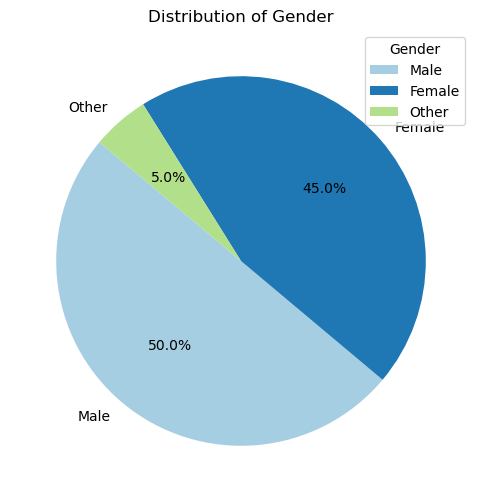

In [12]:
import matplotlib.pyplot as plt

# Sample data
gender_count = pd.Series({'Male': 50, 'Female': 45, 'Other': 5})

plt.figure(figsize=(12, 6))

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(gender_count))))

# Title and legend
plt.title('Distribution of Gender')
plt.legend(title='Gender', loc='upper right', labels=gender_count.index)

# Display the plot
plt.show()

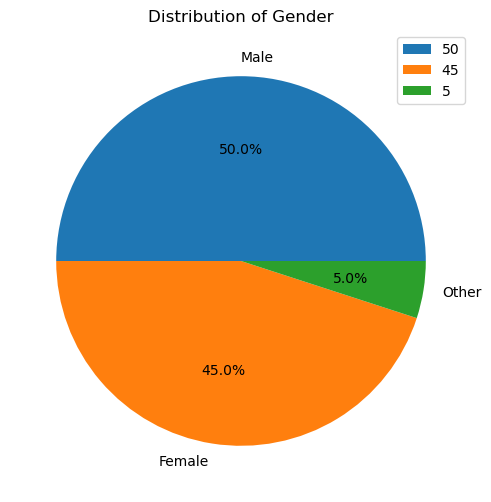

In [13]:
plt.figure(figsize=(12,6))
plt.pie(gender_count, labels=gender_count.index,autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.legend(gender_count)
plt.show()

In [14]:
# Counts the number of occurrences of each unique value in the 'Experience (Years)' column
# and resets the index to convert the result into a DataFrame.
exp_year = df['Experience (Years)'].value_counts().reset_index()
exp_year

,Experience (Years),count
0,3,26
1,2,24
2,1,24
3,11,22
4,19,22
5,10,22
6,13,21
7,16,21
8,14,20
9,9,19


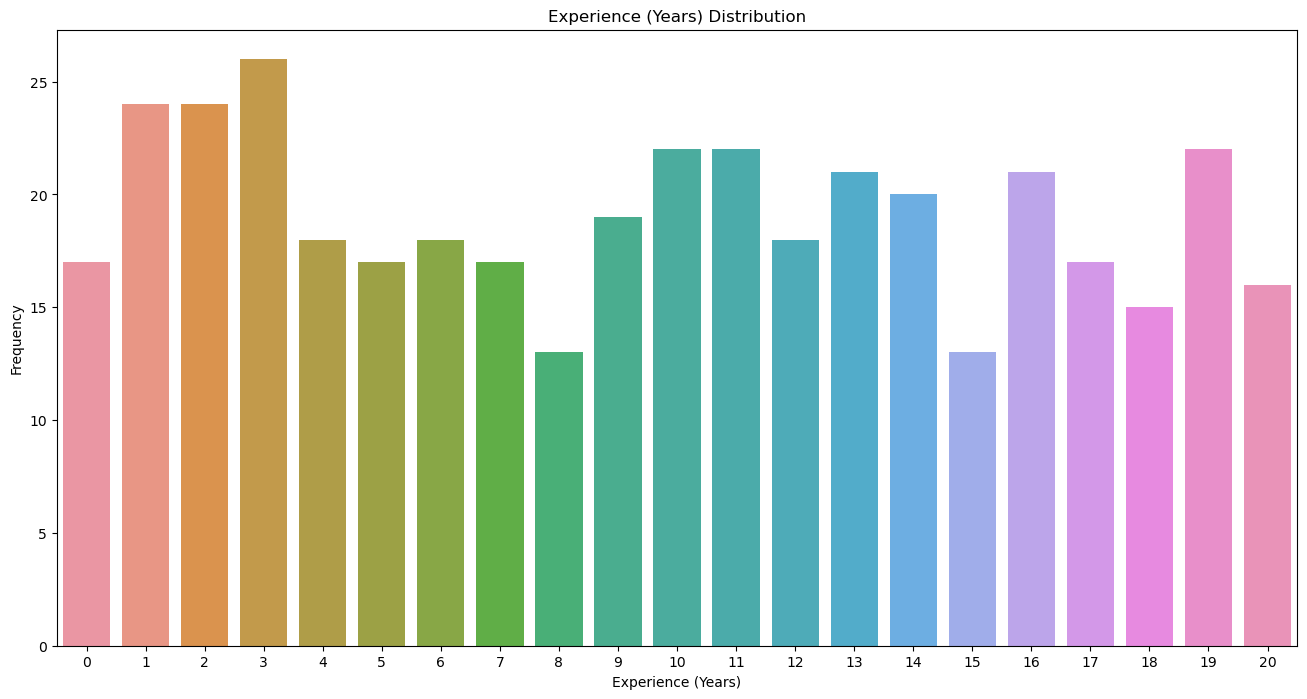

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(exp_year,x='Experience (Years)',y='count')
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.title('Experience (Years) Distribution')
plt.show()

In [16]:
# Counts the number of occurrences of each unique value in the 'Position' column
# and resets the index to convert the result into a DataFrame.
position_count = df['Position'].value_counts().reset_index()
position_count

,Position,count
0,Web Developer,43
1,IT Manager,40
2,IT Security Analyst,39
3,Systems Administrator,38
4,Database Administrator (DBA),38
5,DevOps Engineer,37
6,Systems Analyst,37
7,Software Engineer,36
8,Network Administrator,31
9,IT Support Specialist,31


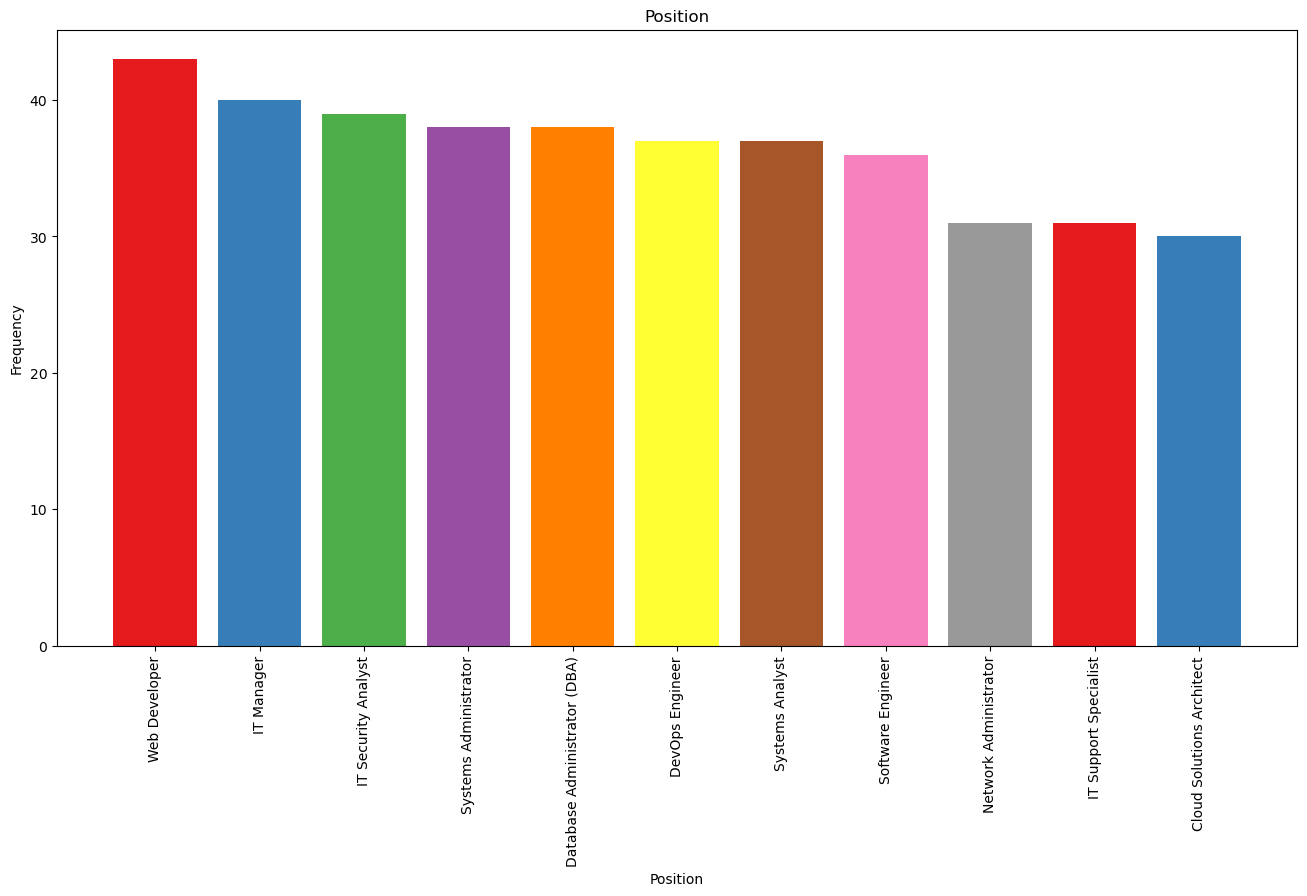

In [17]:
plt.figure(figsize=(16,8))
plt.bar(position_count['Position'],position_count['count'], color=palette)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Position')
plt.xticks(rotation=90)
plt.show()

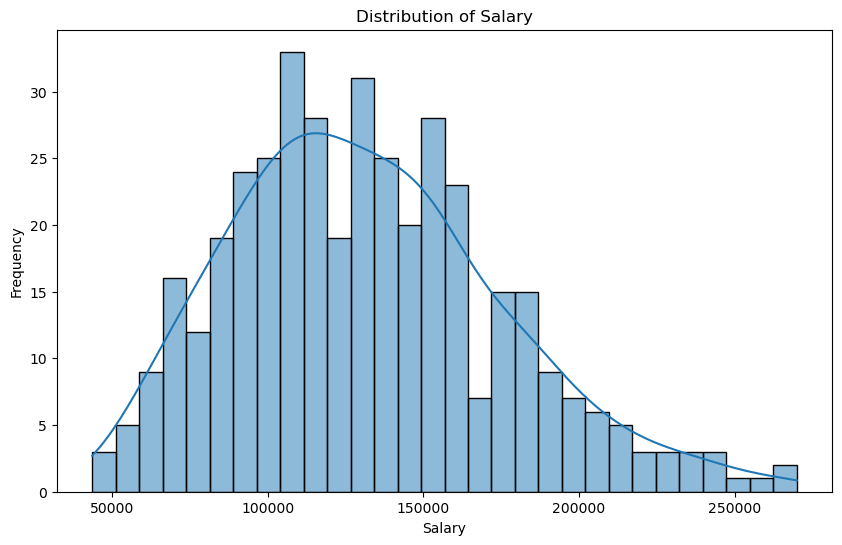

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [19]:
gender_exp=df.groupby('Experience (Years)')['Gender'].value_counts().reset_index()

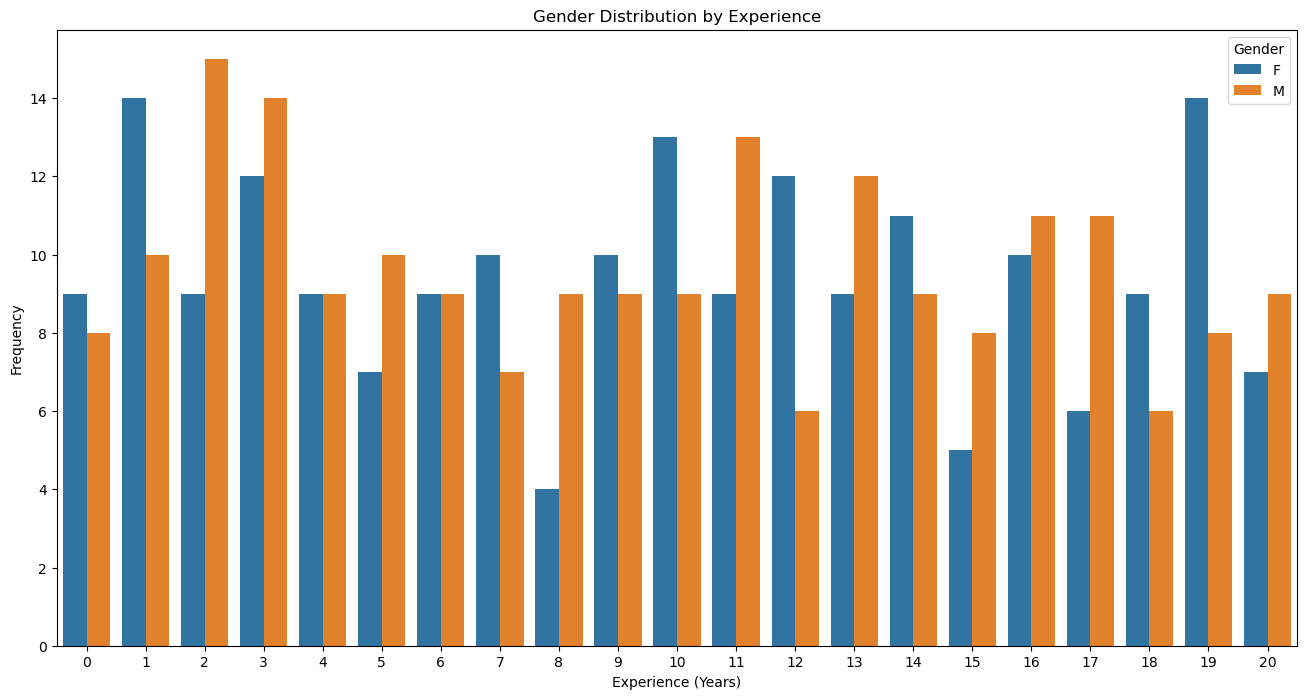

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(gender_exp,x='Experience (Years)',y='count',hue=('Gender'))
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.title('Gender Distribution by Experience')
plt.show()

In [21]:
position_gender=df.groupby('Position')['Gender'].value_counts().reset_index()

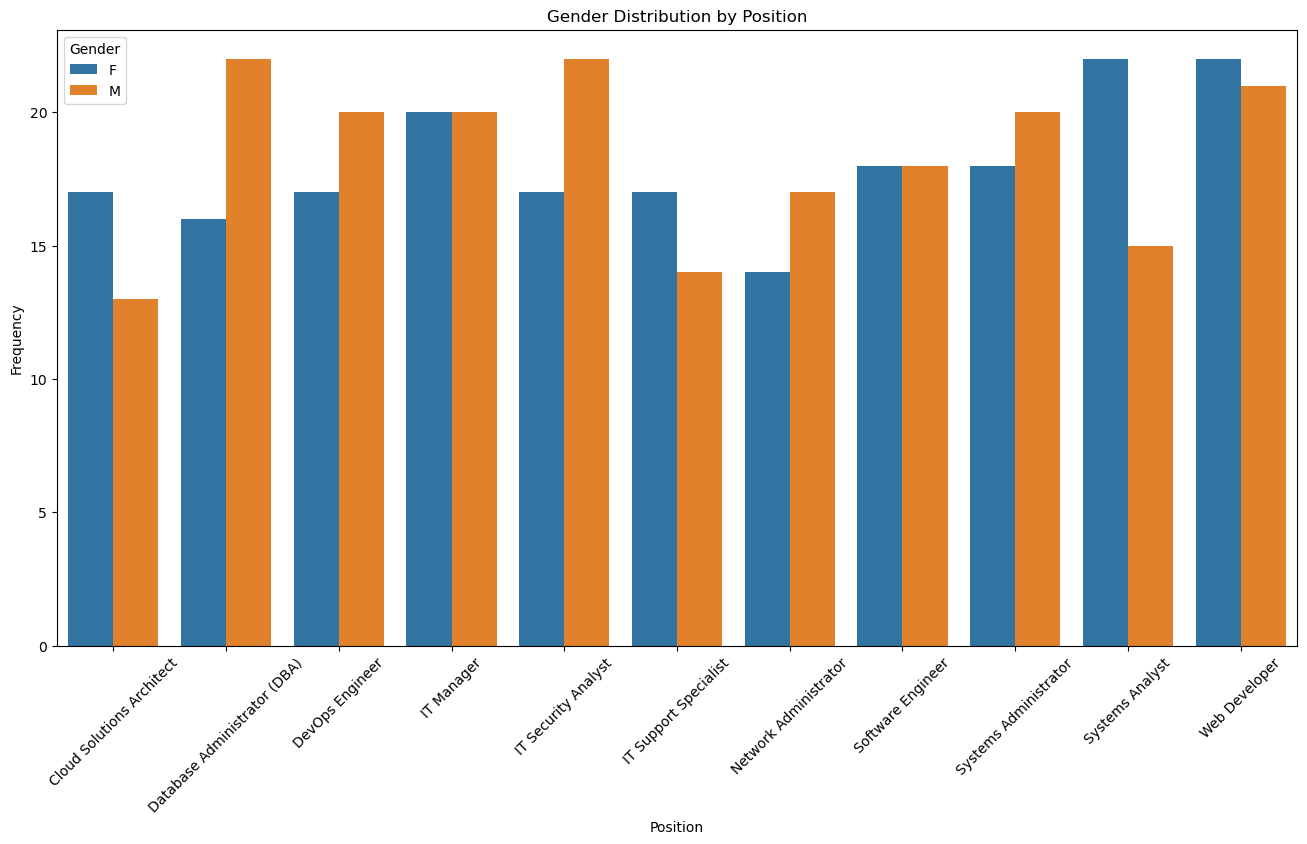

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(position_gender,x='Position',y='count',hue=('Gender'))
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Gender Distribution by Position')
plt.xticks(rotation=45)
plt.show()

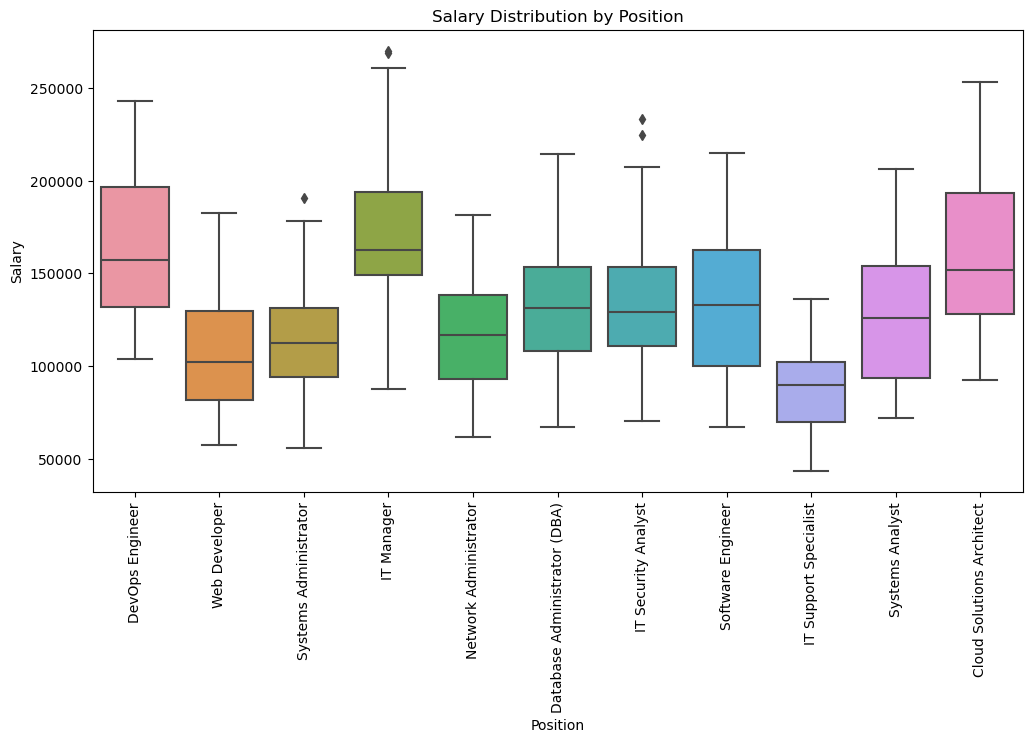

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Position', y='Salary')
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

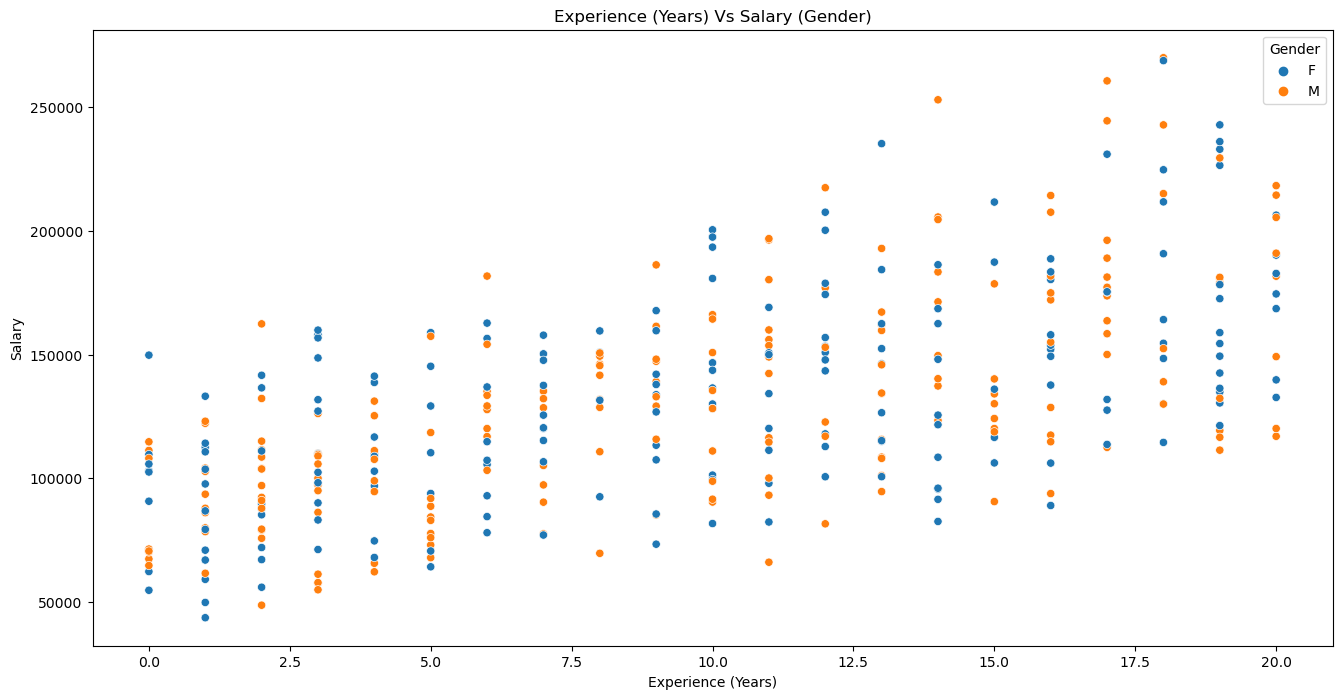

In [24]:
plt.figure(figsize=(16,8))
sns.scatterplot(df, x='Experience (Years)',y='Salary',hue='Gender')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Experience (Years) Vs Salary (Gender)')
plt.show()

In [25]:
position_exp=df.groupby('Position')['Experience (Years)'].value_counts().reset_index()

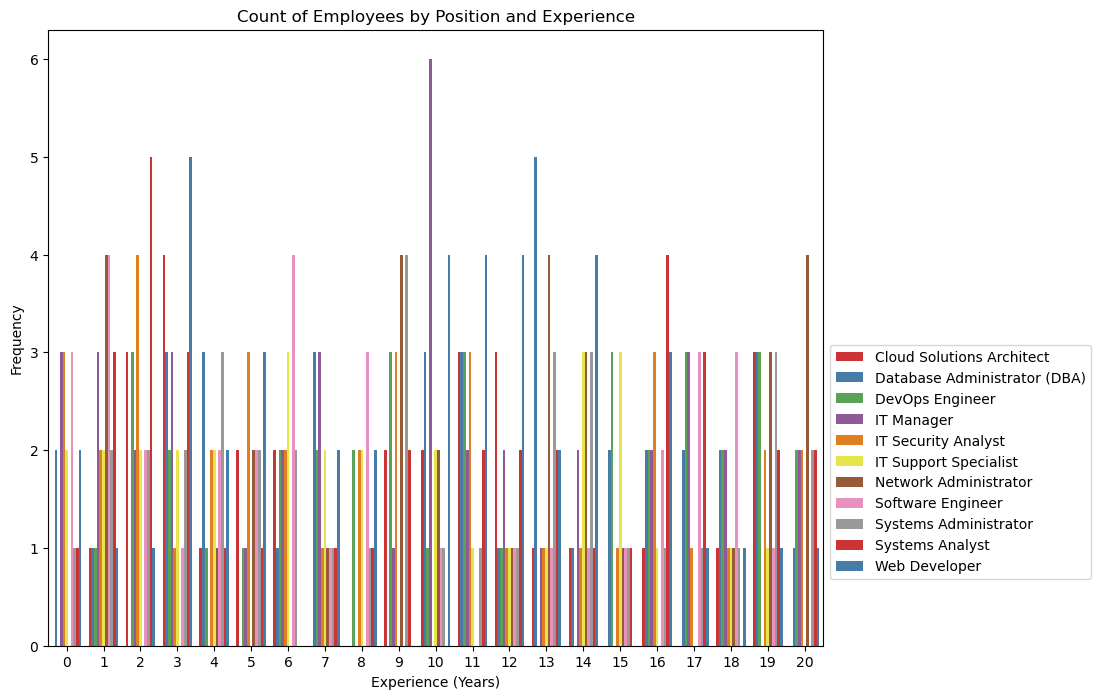

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(x='Experience (Years)', y='count', hue='Position',palette=palette ,data=position_exp)
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.title('Count of Employees by Position and Experience')
plt.legend(bbox_to_anchor=(1, .5))
plt.show()

In [27]:
exp_mean_salary=df.groupby(['Experience (Years)','Gender'])['Salary'].mean().reset_index()
exp_mean_salary

,Experience (Years),Gender,Salary
0,0,F,94415.444444
1,0,M,84792.875000
2,1,F,86774.000000
3,1,M,93968.000000
4,2,F,94100.666667
5,2,M,99242.600000
6,3,F,119758.583333
7,3,M,94884.714286
8,4,F,106437.444444
9,4,M,99058.222222


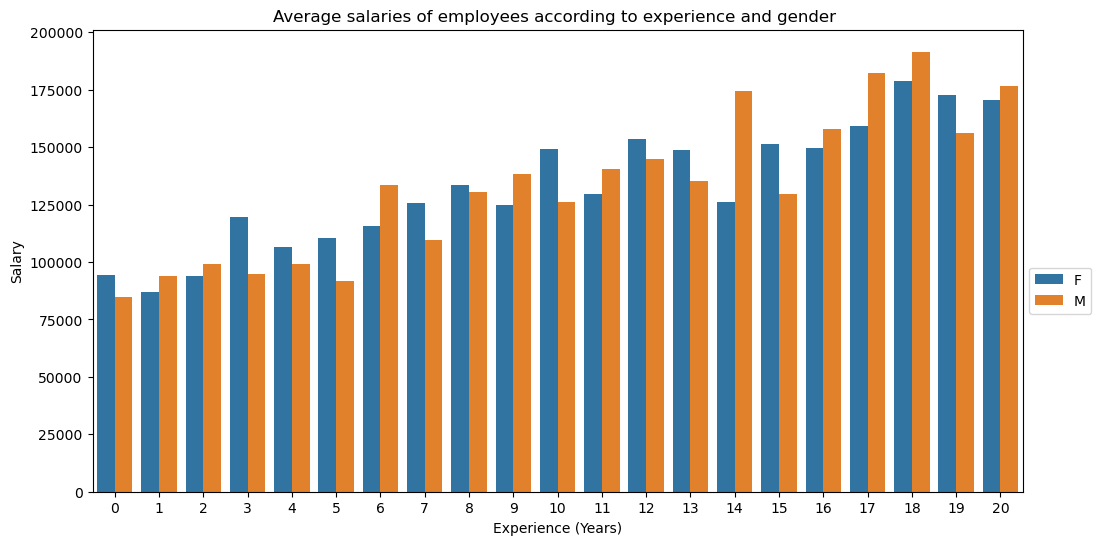

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='Experience (Years)', y='Salary', hue='Gender',data=exp_mean_salary)
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Average salaries of employees according to experience and gender ')
plt.legend(bbox_to_anchor=(1, .5))
plt.show()

In [29]:
position_mean_salary=df.groupby(['Position','Gender'])['Salary'].mean().reset_index()
position_mean_salary

,Position,Gender,Salary
0,Cloud Solutions Architect,F,158085.764706
1,Cloud Solutions Architect,M,164445.461538
2,Database Administrator (DBA),F,135692.687500
3,Database Administrator (DBA),M,130807.727273
4,DevOps Engineer,F,165848.764706
5,DevOps Engineer,M,158467.850000
6,IT Manager,F,164478.050000
7,IT Manager,M,176945.050000
8,IT Security Analyst,F,148443.529412
9,IT Security Analyst,M,123620.545455


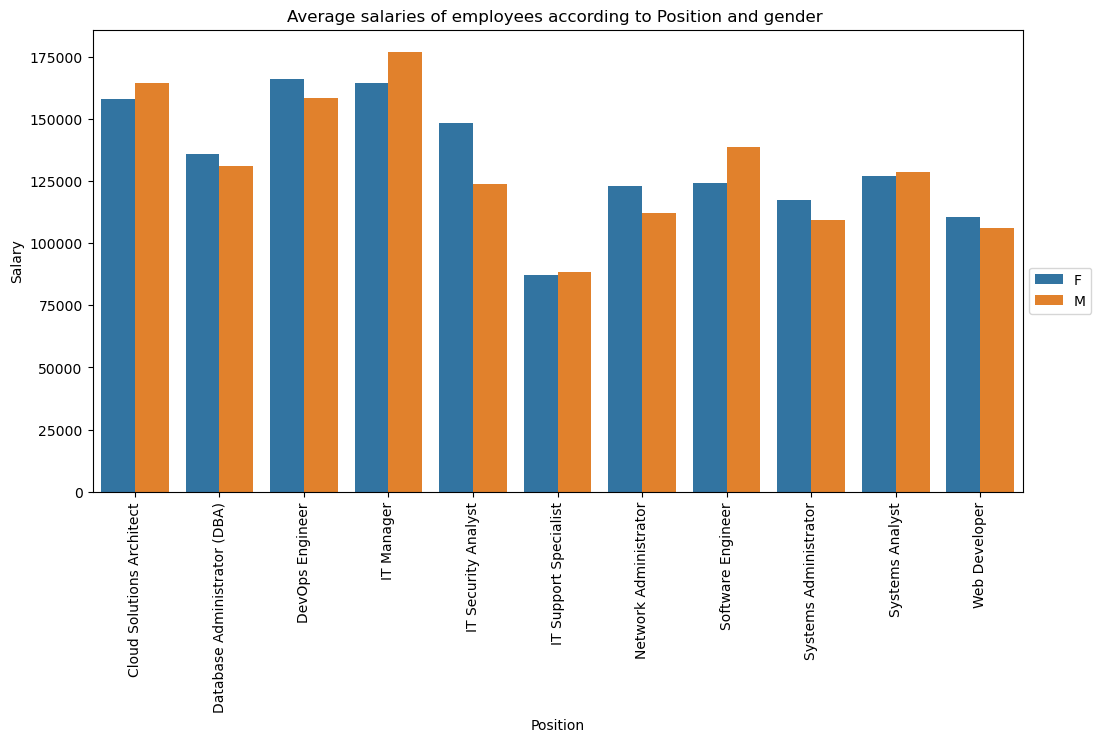

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='Position', y='Salary', hue='Gender',data=position_mean_salary)
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Average salaries of employees according to Position and gender ')
plt.legend(bbox_to_anchor=(1, .5))
plt.xticks(rotation=90)
plt.show()

In [31]:
salaries=df.groupby(['Position','Experience (Years)','Gender'])['Salary'].mean().reset_index()
salaries

,Position,Experience (Years),Gender,Salary
0,Cloud Solutions Architect,1,M,104113.000000
1,Cloud Solutions Architect,2,F,139080.000000
2,Cloud Solutions Architect,2,M,92288.000000
3,Cloud Solutions Architect,3,F,143509.000000
4,Cloud Solutions Architect,3,M,109842.500000
...,...,...,...,...
263,Web Developer,16,M,108672.666667
264,Web Developer,17,M,181301.000000
265,Web Developer,18,M,152404.000000
266,Web Developer,19,M,119320.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_5700\180491388.py:2: UserWarning: 
The palette list has fewer values (9) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(salaries,x='Experience (Years)',y='Salary',hue='Position',style='Gender',palette=palette)


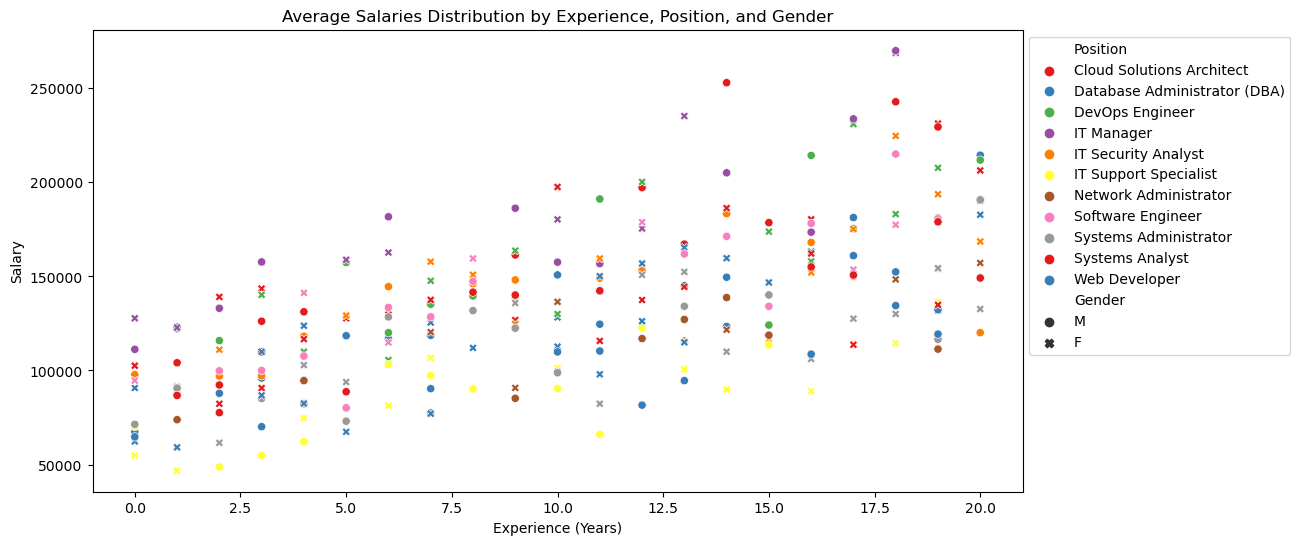

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(salaries,x='Experience (Years)',y='Salary',hue='Position',style='Gender',palette=palette)
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Average Salaries Distribution by Experience, Position, and Gender')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [33]:
employee_salary=df.groupby(['Position','Experience (Years)','Gender'])['Salary'].max().reset_index().sort_values(by='Salary',ascending=False)
employee_salary

,Position,Experience (Years),Gender,Salary
92,IT Manager,18,M,269950
91,IT Manager,18,F,268774
90,IT Manager,17,M,260594
16,Cloud Solutions Architect,14,M,252949
68,DevOps Engineer,19,F,242819
...,...,...,...,...
243,Web Developer,1,F,59145
128,IT Support Specialist,3,M,54938
122,IT Support Specialist,0,F,54739
124,IT Support Specialist,1,F,49817


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


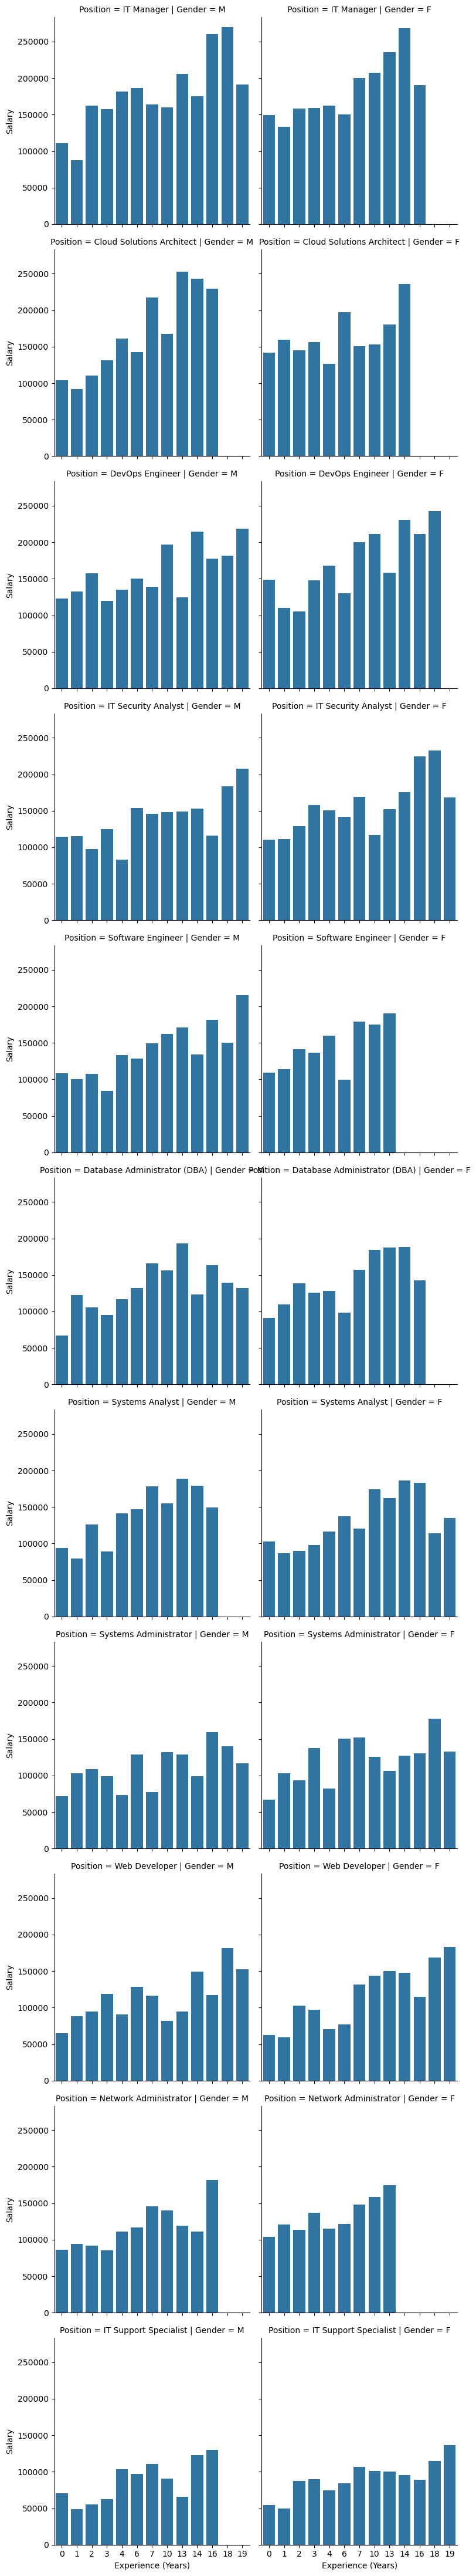

In [34]:
g = sns.FacetGrid(employee_salary, col="Gender", row="Position", height=4)
g.map(sns.barplot, "Experience (Years)", "Salary")
plt.show()

In [35]:
count_employee_salary=df.groupby(['Position','Experience (Years)','Gender'])['Salary'].count().reset_index().sort_values(by='Salary',ascending=False)
count_employee_salary

,Position,Experience (Years),Gender,Salary
83,IT Manager,10,F,4
167,Software Engineer,1,F,4
246,Web Developer,3,M,3
37,Database Administrator (DBA),13,M,3
47,DevOps Engineer,2,M,3
...,...,...,...,...
120,IT Security Analyst,20,F,1
121,IT Security Analyst,20,M,1
122,IT Support Specialist,0,F,1
123,IT Support Specialist,0,M,1


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


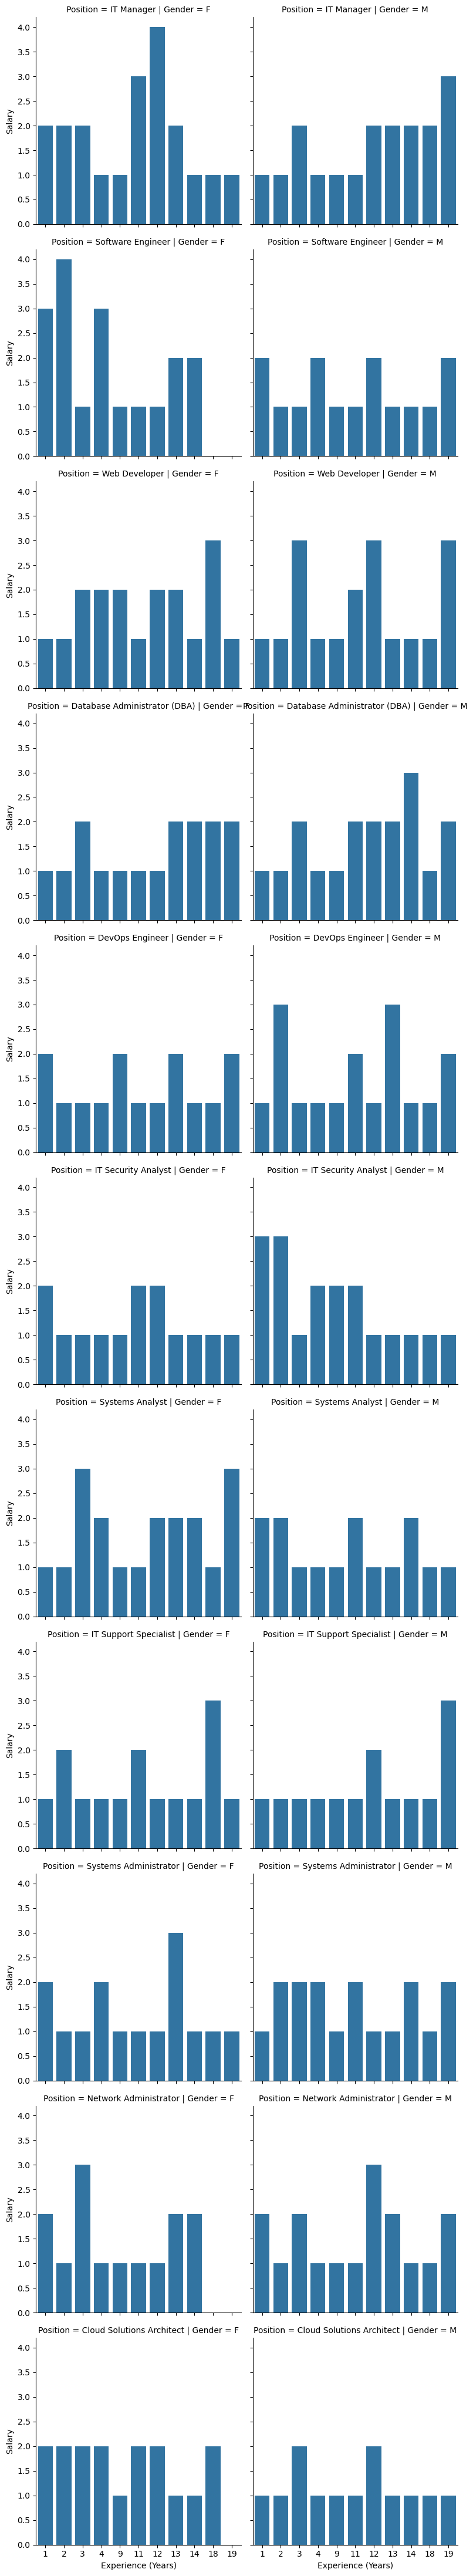

In [36]:
g = sns.FacetGrid(count_employee_salary, col="Gender", row="Position", height=4)
g.map(sns.barplot, "Experience (Years)", "Salary")
plt.show()